# Статистические методы

Библиотека NumPy предоставляет несколько методов для выполнения статистического анализа по всему массиву в целом или по одной из его осей.

## Порядковая статистика

### Максимумы и минимумы

Мы уже использовали методы ```np.min``` и ```np.max``` для поиска минимальных и максимальных значений в массиве (эти методы также доступны по именам ```np.amin```
и ```np.ama```x). Если массив содержит одно или несколько значений ```NaN```, то соответствующим минимальным или максимальным значением будет ```np.nan```.Чтобы не учитывать значения ```NaN```, следует использовать ```np.nanmin``` и ```np.nanmax```:

In [2]:
import numpy as np
a = np.sqrt(np.linspace(-2, 2, 4))

<ipython-input-2-c2bae3382bc6>:2: RuntimeWarning: invalid value encountered in sqrt
  a = np.sqrt(np.linspace(-2, 2, 4))


In [3]:
print(a)

[       nan        nan 0.81649658 1.41421356]


In [4]:
np.min(a), np.max(a)

(nan, nan)

In [5]:
np.nanmin(a), np.nanmax(a)

(0.8164965809277259, 1.4142135623730951)

Нам также встречались функции ```np.argmin``` и ```np.argmax```, которые возвращают индекс минимальных и максимальных значений в массиве, для них тоже
существуют варианты ```np.nanargmin``` и ```np.nanargmax```:

In [6]:
 np.argmin(a), np.argmax(a)

(0, 0)

In [7]:
np.nanargmin(a), np.nanargmax(a)

(2, 3)

Родственные методы ```np.fmin``` / ```np.fmax``` и ```np.minimum``` / ```np.maximum``` сравнивают
два массива элемент за элементом и возвращают другой массив той же формы.
Первая пара методов не учитывает значения NaN, вторая пара методов передает значения ```NaN``` в итоговый массив. Например:

In [8]:
 np.fmin([1, -5, 6, 2], [0, np.nan, -1, -1])

array([ 0., -5., -1., -1.])

In [9]:
np.maximum([1, -5, 6, 2], [0, np.nan, -1, -1])

array([ 1., nan,  6.,  2.])

## Процентили

Метод ```np.percentile``` возвращает определенный процентиль ```q```  по данным
некоторой оси (или по данным линеаризованной версии массива, если ось
не задана). Минимум массива – это значение с ```q = 0``` (с нулевым процентилем),
максимум массива – это значение с ```q = 100``` (с 100-м процентилем), а медианное (срединное) значение соответствует ```q  = 50``` (50-му процентилю). Если в массиве несколько значений точно соответствуют требуемому значению ```q```,
то используется взвешенное среднее значение двух таких ближайших значений. Например:

In [11]:
a = np.array([[0., 0.6, 1.2], [1.8, 2.4, 3.0]])

In [12]:
np.percentile(a, 50)

1.5

In [13]:
np.percentile(a, 75)

2.25

In [14]:
np.percentile(a, 50, axis=1)

array([0.6, 2.4])

In [15]:
np.percentile(a, 75, axis=1)

array([0.9, 2.7])

# Средние значения, дисперсии и корреляции

## Средние значения

В дополнение к методу ```np.mean```, который вычисляет арифметическое среднее
для значений в заданной оси массива,библиотека NumPy предоставляет методы
для вычисления взвешенного среднего значения,медианы, стандартного отклонения и дисперсии. Взвешенное среднее значение вычисляется по формуле

![](1.png)

где весовые коэффициенты ```wi``` представлены как последовательность той же
длины, что и массив. Например:

In [17]:
x = np.array([1., 4., 9., 16.])

In [18]:
np.mean(x)

7.5

In [19]:
 np.median(x)

6.5

In [20]:
np.average(x, weights=[0., 3., 1., 0.])

5.25

Если необходима сумма весовых коэффициентов, а  также взвешенное
среднее значение, то для аргумента ```returned``` устанавливается значение ```True```.
В  следующем примере демонстрируется этот подход, а  также определяются
взвешенные средние значения в каждой строке (```axis=1``` средние значения по
столбцам двумерного массива):

In [21]:
x = np.array( [[1., 8., 27], [-0.5, 1., 0.]] )

In [22]:
av, sw = np.average(x, weights=[0., 1., 0.1], axis=1, returned=True)

In [23]:
 print(av)

[9.72727273 0.90909091]


In [24]:
print(sw)

[1.1 1.1]


Таким образом, средние значения равны (1 × 8 + 0.1 × 27)/1.1 = 9.72727273 и
(1 × 1.)/1.1 = 0.90909091, где 1.1 – сумма весовых коэффициентов.

## Стандартные отклонения и дисперсии

Функция ```np.std``` вычисляет по умолчанию нескорректированное стандартное
отклонение выборки по формуле:

![](2.png)

где ```xi``` – ```N``` наблюдаемых значений в массиве, а ```x``` – их среднее значение (меана).
Для вычисления скорректированного стандартного отклонения выборки по формуле

![](3.png)

в аргумент ```ddof``` передается значение ```δ```, такое, что ```N − δ``` является числом степеней свободы в конкретной выборке. 
Например, если значения выборки извлекаются из совокупности независимо с заменой и используются для вычисления 
```x```, то существует ```N − 1``` степеней свободы в векторе разностей, используемом для
вычисления ```σ```: ```(x1 − x, x2 − x,…, xN − x)```, следовательно, ```δ = 1```. Например:

In [28]:
x = np.array([1., 2., 3., 4.])

In [29]:
np.std(x) # Или x.std(), нескорректированное стандартное отклонение.

1.118033988749895

In [30]:
np.std(x, ddof=1) # Скорректированное стандартное отклонение.

1.2909944487358056

Функция ```np.nanstd``` вычисляет стандартное отклонение без учета значений
```np.nan``` (поэтому ```N``` – это количество не-NaN значений в массиве). В NumPy также имеются методы для вычисления дисперсии значений в  массиве: ```np.var``` и ```np.nanvar```.

Ковариацию возвращает метод ```np.cov```. При самом простом вызове в  него
можно передать один двумерный массив ```X```, в  котором строки представляют
переменные ```xi```, а столбцы – наблюдения значений каждой переменной. Тогда ```np.cov(X)``` возвращает матрицу ковариации ```Cij```, показывающую, как переменная ```xi``` изменяется по сравнению с переменной ```xj```.Элемент ```Cij``` называют оценкой ковариации переменных ```xi``` и ```xj```:

![](4.png)

где ```μi``` – среднее значение переменной ```xi```
, а ```E[ ]``` обозначает ожидаемое значение. Если существует ```N``` наблюдаемых значений для каждой переменной, то
```μi = 1/N∑k*xik```. Тогда несмещенная оценка ковариации:

![](5.png)

Это поведение по умолчанию метода ```np.cov```, но если для аргумента ```bias``` установлено значение 1, то ```N``` используется в знаменателе формулы для получения смещенной оценки ковариации.Кроме того,можно явно установить знаменатель равным ```N − δ```, передавая ```δ``` как значение аргумента ```ddof``` метода ```cov```.

**Пример**. В качестве примера рассмотрим матрицу из пяти наблюдений для каждой из трех переменных ```x0```, ```x1``` и ```x2```, наблюдаемые значения которых содержатся в трех строках массива ```X```:

In [34]:
X = np.array([ [0.1, 0.3, 0.4, 0.8, 0.9],
 [3.2, 2.4, 2.4, 0.1, 5.5],
 [10., 8.2, 4.3, 2.6, 0.9]
 ])

Ковариационная матрица представлена массивом 3×3:

In [35]:
print( np.cov(X) )

[[ 0.115   0.0575 -1.2325]
 [ 0.0575  3.757  -0.8775]
 [-1.2325 -0.8775 14.525 ]]


Элементы на главной диагонали ```Cii``` – это дисперсии переменных ```xi``` с предположением об ```N − 1``` степенях свободы:

In [36]:
print(np.var(X, axis=1, ddof=1))

[ 0.115  3.757 14.525]


Несмотря на то что величину элементов матрицы ковариации не всегда легко интерпретировать (потому что она зависит от величины отдельных наблюдений, которые могут существенно отличаться для различных переменных),
очевидно, что существует сильная антикорреляция между ```x0``` и ```x2``` (C02 = −1.2325:
когда одно значение увеличивается, другое уменьшается) и  слабая (несильная) корреляция между ```x0``` и ```x1``` (C01 = 0.0575: ```x0``` и ```x1``` не показывают сильный совместный тренд).

Матрица коэффициентов корреляции часто используется вместо матрицы ковариации, так как она нормализована посредством деления элементов ```Cij```
на произведение стандартных отклонений переменных:

![](6.png)

Это означает, что элементы ```Pij``` имеют значения от −1 до 1 включительно,
а диагональные элементы ```Pii = 1```. В рассматриваемом здесь примере
использование метода ```np.corrcoef``` дает следующий результат:

In [37]:
 print( np.corrcoef(X) )

[[ 1.          0.0874779  -0.95363007]
 [ 0.0874779   1.         -0.11878687]
 [-0.95363007 -0.11878687  1.        ]]


В этой матрице коэффициентов корреляции легко заметить сильную антикорреляцию между ```x0``` и ```x2``` (C0,2 = −0.954) и отсутствие корреляции между ```x1``` и другими переменными (например, C1,0 = 0.087).
Оба метода ```np.cov``` и ```np.corrcoeff``` могут принимать второй объект типа массив, содержащий дополнительный набор переменных и  наблюдений, поэтому их можно назвать парой одномерных массивов без объединения в единую
матрицу:

In [38]:
x = np.array([1., 2., 3., 4., 5.])

In [39]:
y = np.array([0.08, 0.31, 0.41, 0.48, 0.62])

In [40]:
print( np.corrcoef(x,y) )

[[1.         0.97787645]
 [0.97787645 1.        ]]


Таким образом:

In [41]:
np.corrcoef(x, y)

array([[1.        , 0.97787645],
       [0.97787645, 1.        ]])

представляет собой удобный альтернативный вариант для

In [42]:
np.corrcoef(np.vstack((x,y)))

array([[1.        , 0.97787645],
       [0.97787645, 1.        ]])

А если наблюдения располагаются в  строках матрицы в  переменных, соответствующих столбцам (вместо других позиций), то нет необходимости в транспонировании этой матрицы, нужно просто передать аргумент ```rowvar=0```
либо в ```np.cov```, либо в ```np.corrcoef```, а NumPy позаботится обо всем.

**Пример 2**. Отделение цифровых технологий Кембриджского университета
(Cambridge University Digital Technology Group) ведет записи наблюдений за погодой с крыши своего корпуса с 1995 г. Эти данные доступны для скачивания в одном CSV-файле в ресурсах.

Программа в листинге 1 определяет коэффициент корреляции между атмосферным давлением и температурой в этой местности.

**Листинг 1**. Вычисление коэффициента корреляции между температурой воздуха и атмосферным давлением

p-T correlation coefficient: 0.0277


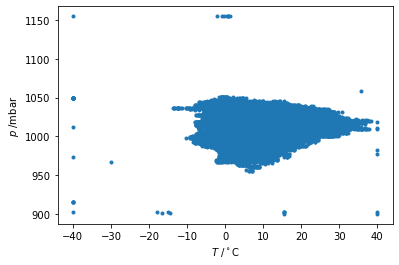

In [45]:
# eg6-pT.py
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt('weather-raw.csv', delimiter=',', usecols=(1, 4))
# Удаление всех строк, в которых пропущено значение T или значение p.
data = data[~np.any(np.isnan(data), axis=1)]
# Значения температуры фиксируются после умножения на 10, поэтому необходимо исключить
# этот множитель.
data[:,0] /= 10
# Вычисление коэффициента корреляции.
corr = np.corrcoef(data , rowvar=0)[0, 1]
print('p-T correlation coefficient: {:.4f}'.format(corr))

# Изображение данных на корреляционной диаграмме рассеяния: T по оси x, p по оси y.
plt.scatter(*data.T, marker='.')
plt.xlabel('$T$ /$\mathrm{^\circ C}$')
plt.ylabel('$p$ /mbar')
plt.show()


Вывод дает коэффициент корреляции 0.0260: как и ожидалось, существует весьма слабая корреляция между температурой воздуха и  атмосферным давлением (поскольку плотность воздуха также изменяется).

В этом наборе данных корреляция между температурой воздуха и атмосферным
давлением практически отсутствует

## Гистограммы

Функция NumPy ```np.histogram``` создает гистограмму из значений массива. Набор интервалов (bins) определяется по нижнему и верхнему предельным значениям, и каждый интервал заполняется определенным количеством элементов массива, значения которых попадают в  границы интервала. Например, рассмотрим следующий массив, содержащий оценки в процентах 10 студентов
на экзамене:

In [47]:
marks = np.array([45, 68, 56, 23, 60, 87, 75, 59, 63, 72])

Существует несколько способов определения интервалов гистограммы. Если аргумент ```bins``` является последовательностью, то ее значения определяют границы последовательных интервалов:

In [48]:
bins = [20, 40, 60, 80, 100]

Эта последовательность определяет четыре интервала с диапазонами ```[20–
40 %)```, ```[40–60 %)```, ```[60–80 %)``` и ```[80–100 %]```. Все интервалы, кроме последнего, полуоткрытые, т. е. первый интервал включает метки от 20 %, в том числе саму эту метку, до 40 %, не включая само это значение. Следует отметить, что для последовательности из ```N + 1``` чисел требуется создание ```N``` интервалов. Метод
```np.histogram``` возвращает кортеж из значений гистограммы и  ранее определенных границ интервалов (оба набора в виде массивов NumPy).



In [49]:
hist, bins = np.histogram(marks, bins)

In [50]:
 hist

array([1, 3, 5, 1], dtype=int64)

In [51]:
 bins

array([ 20,  40,  60,  80, 100])

Здесь можно видеть, что в интервале ```20–4%``` имеется одна метка, в интервале ```40–60 %``` находятся три метки и т. д.
Если необходимо создать определенное количество равномерно распределенных интервалов, то в  аргументе bins вместо последовательности можно передать одно целое число:

In [52]:
np.histogram(marks, bins=5)

(array([1, 1, 3, 3, 2], dtype=int64),
 array([23. , 35.8, 48.6, 61.4, 74.2, 87. ]))

По умолчанию требуемое количество интервалов распределяется между минимальным и максимальным значениями массива (в показанном выше примере это значения 23 и 87). Чтобы определить другие значения минимума и максимума, необходимо передать соответствующий кортеж в аргументе ```range```:

In [53]:
 np.histogram(marks, bins=5, range=(0, 100))

(array([0, 1, 3, 5, 1], dtype=int64),
 array([  0.,  20.,  40.,  60.,  80., 100.]))

Метод ```np.histogram``` также принимает необязательный аргумент ```density```:
по умолчанию задано значение ```False```, означающее, что возвращаемый массив гистограммы содержит количество значений из исходного массива в каждом интервале. Если для ```density``` задано значение ```True```, то массив гистограммы будет содержать функцию плотности вероятности, нормализованную так, что интеграл по всей площади диапазона интервалов равен единице:

In [54]:
hist, bins = np.histogram(marks, bins=5, range=(0,100),density=True)

In [55]:
print(hist)

[0.    0.005 0.015 0.025 0.005]


In [56]:
 bin_width = 100/5

In [57]:
print(np.sum(hist) * bin_width)

0.9999999999999999


(Здесьпод интегралом подразумевается площадь внутри гистограммы,представленная суммой произведений высоты каждого интервала на его ширину.)
Для вывода гистограммы с  помощью ```pyplot``` используется метод ```pyplot.hist``` с  передачей в  него тех же аргументов, которые передавались в  метод
```np.histogram```:

In [58]:
import matplotlib.pyplot as plt

(array([0., 1., 3., 5., 1.]), array([  0.,  20.,  40.,  60.,  80., 100.]))

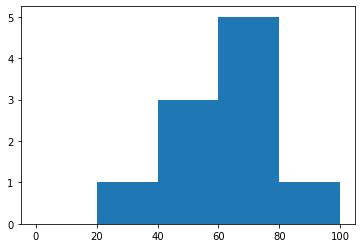

In [60]:
hist, bins, patches = plt.hist(marks, bins=5, range=(0, 100))
hist, bins

In [62]:
plt.show()

В дополнение к счетчикам (hist) и границам (bins) метод ```pyplot``` возвращает список ссылок на «патчи» (patches), которые появляются на изображаемой фигуре.

# Упражнения

## Задачи

**Задача 1**. 
В некоторой лотерее участвуют игроки, выбирающие шесть чисел без
замены из интервала ```[1, 49]```. Джекпот разделяется между игроками, угадавшими все шесть чисел («выпавших лотерейных шаров»), выбранных случайным образом в розыгрыше, который проводится каждые две недели (порядок угаданных чисел не имеет значения). Если ни один из игроков не угадал каждое выпавшее число, то джекпот считается неразыгранным и добавляется к джекпоту следующего розыгрыша.
Несмотря на то что эта лотерея честная в том смысле, что каждая комбинация случайно выбираемых чисел является равновероятной, было сделано следующее наблюдение: многие игроки отдают предпочтение выбору определенных чисел, например представляющих даты (т.е. большинство выбираемых чисел находится в интервале [1, 31], как будто эти числа ожидаются в большей степени, чем выбираемые случайно). Поэтому, чтобы избежать дележа джекпота, следовательно, получить максимальный выигрыш в одиночку, имеет смысл не использовать эти числа.

Проверить это предположение, установив, существует ли какая-либо связь
(корреляция) между количеством шаров со значениями меньше 13 (представляющих номер месяца) и  выигрышами джекпота одним человеком. Не  учитывать розыгрыши, которые приводили к  увеличению джекпота (т.е. без выигравших текущий джекпот). Необходимые данные ```lottery-draws.txt``` можно скачать в ресурсах.

**Задача 2**. В этом разделе мы видели, как создать графическое изображение гистограммы из массива с  помощью метода ```pyplot.hist```, но предположим, что массивы ```hist``` и ```bins``` уже созданы с использованием метода ```np.histogram``` и необходимо построить итоговую гистограмму по этим массивам. Невозможно
воспользоваться ```pyplot.hist```, потому что эта функция ожидает для обработки
массив исходных данных. Необходимо использовать ```pyplot.bar``` для создания
изображения по массиву ```hist``` в виде столбиковой диаграммы (bar chart, собственно, это и есть гистограмма).

**Задача 3**
Значения роста в  сантиметрах в  выборке из  1000 взрослых мужчин и  1000 взрослых женщин из определенной совокупности собраны в  файлах данных ```ex6-3-f-male-heights.txt``` и  ```ex6-3-f-female-heights.txt```, доступных в ресурсах. Прочитать эти данные и  вычислить среднее значение и стандартное отклонение по каждому полу. Создать гистограммы для
этих двух наборов данных с использованием наиболее подходящего интервала и показать их графически на одном изображении.
Решить эту же задачу в единицах британской системы (в футах и дюймах).